<a href="https://colab.research.google.com/github/ashraf-badalov/ml-projects/blob/master/random_forest_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv("german_credit_data.csv")
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [30]:
print(f"The given data have {data.shape[0]} samples and {data.shape[1]} columns")

The given data have 1000 samples and 9 columns


In [31]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [32]:
data['Saving accounts'] = data['Saving accounts'].fillna('Unknown')
data['Checking account'] = data['Checking account'].fillna('Unknown')
data.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [33]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [35]:
data.Purpose.value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

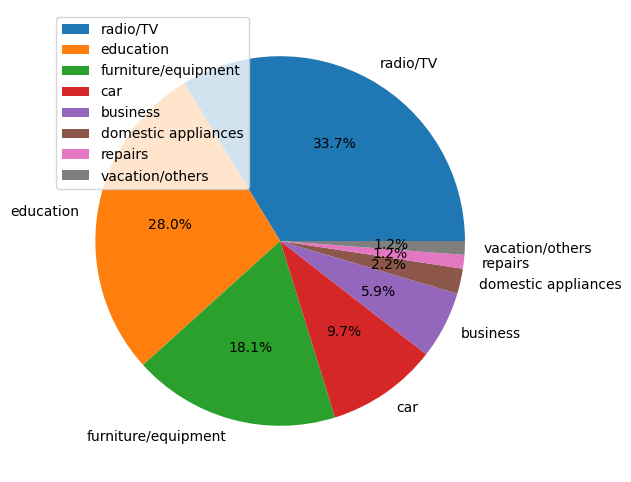

In [36]:
values = data.Purpose.value_counts()
names = data.Purpose.unique()

fig = plt.figure(figsize = (6,6))
plt.pie(values, labels=names, autopct='%1.1f%%')
plt.legend(loc='upper left')
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder

categor_col = ['Sex', 'Housing', 'Saving accounts', 'Checking account']

encoder = LabelEncoder()

for column in categor_col:
  data[column] = encoder.fit_transform(data[column])

In [42]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,1,1169,6,radio/TV
1,22,0,2,1,1,2,5951,48,radio/TV
2,49,1,1,1,1,0,2096,12,education
3,45,1,2,0,1,1,7882,42,furniture/equipment
4,53,1,2,0,1,1,4870,24,car


In [44]:
X = data.iloc[:, :-1]
y = data['Purpose']

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, bootstrap=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print(f'Accuracy of the model: {acc}')

Accuracy of the model: 0.365


In [51]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='not majority')

X_res, y_res = ros.fit_resample(X, y)

In [52]:
y_res.value_counts()

radio/TV               337
education              337
furniture/equipment    337
car                    337
business               337
domestic appliances    337
repairs                337
vacation/others        337
Name: Purpose, dtype: int64

In [54]:
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size = 0.2,
                                                                    random_state = 42)

In [55]:
classifier = RandomForestClassifier()
classifier.fit(X_res_train, y_res_train)
pred = classifier.predict(X_res_test)
accuracy = accuracy_score(pred, y_res_test)
print(f'Accuracy of the new model: {accuracy}')

Accuracy of the new model: 0.8444444444444444


In [62]:
precision = precision_score(pred, y_res_test, average='weighted')
precision

0.882250488423328

In [61]:
f1 = f1_score(pred, y_res_test, average='weighted')
f1

0.8561394561553607